<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_05_02_%EB%B3%80%EC%88%98%EB%B3%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 필수 라이브러리 import

In [ ]:
cd drive/My Drive/데이터분석 청년수련생/07_05_데이터전처리(2)

[Errno 2] No such file or directory: 'drive/My Drive/데이터분석 청년수련생/07_05_데이터전처리(2)'
/content/drive/My Drive/데이터분석 청년수련생/07_05_데이터전처리(2)


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 리스트 형해 테이터 병합
train_test_data = [train,test]

### 2. 변수변환 : log 변환

In [ ]:
# 데이처 카피

data = train.copy()

display(data.shape,
        data.describe(include = "object")) # 범주형 변수 기초통계량

(891, 12)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
data.describe() #연속형 변수 기초통계량

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 연속형 변수 추출
numerical_feats = data.dtypes[data.dtypes =="int64"].index
numerical_feats = numerical_feats.append(data.dtypes[data.dtypes == "float64"].index)
print("연속형 변수 카운트 : ", len(numerical_feats))

연속형 변수 카운트 :  7


In [ ]:
numerical_feats

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare'], dtype='object')

In [ ]:
# 연속형 변수의 왜도와 첨도 확인

for col in numerical_feats:
  print("{:15}".format(col),
        "skewness : {:05.2f}".format(data[col].skew()),
        "     ",
        "kurtosis: {:06.2f}".format(data[col].kurt()))

PassengerId     skewness : 00.00       kurtosis: -01.20
Survived        skewness : 00.48       kurtosis: -01.78
Pclass          skewness : -0.63       kurtosis: -01.28
SibSp           skewness : 03.70       kurtosis: 017.88
Parch           skewness : 02.75       kurtosis: 009.78
Age             skewness : 00.39       kurtosis: 000.18
Fare            skewness : 04.79       kurtosis: 033.40


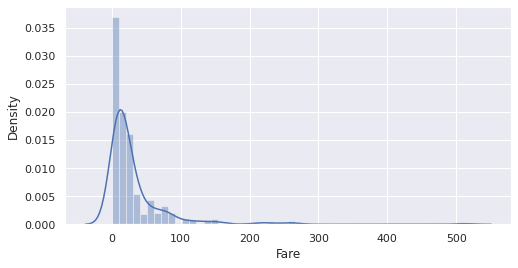

In [ ]:
# 왜도가 큰 "Fare" 변수 분포 확인

f, ax = plt.subplots(figsize = (8,4))

sns.distplot(data.Fare)

skew : 0.395 kurt : 0.976


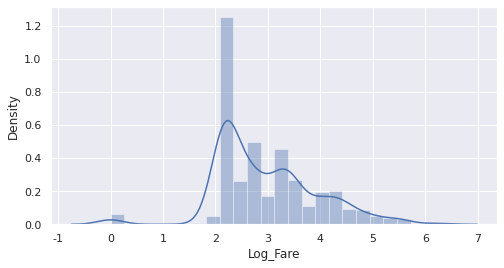

In [ ]:
# 로그변환 수행
# np.log1p 사용

data["Log_Fare"] = np.log1p(data.Fare)

f,ax = plt.subplots(figsize = (8,4))

sns.distplot(data.Log_Fare)

print("skew :", round(data.Log_Fare.skew(),3),
      "kurt :", round(data.Log_Fare.kurt(),3))

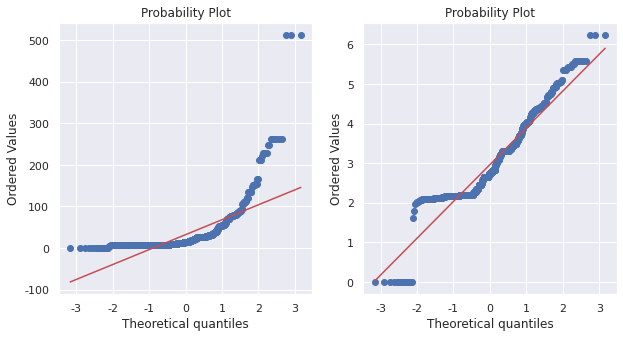

In [ ]:
# QQ-Plot으로 정규성 검정

fig = plt.figure(figsize = (10,5))

fig.add_subplot(1,2,1)
res = stats.probplot(data.Fare, plot = plt)

fig.add_subplot(1,2,2)
res = stats.probplot(data.Log_Fare, plot = plt)

# 로그변환 후 우측 그림처럼 빨간선에 가깝게 데이터 분포가 구성된 것으로 확인

### 3. 변수 변환: MinMaxScaler

In [ ]:
# 데이터 확인
# train_test_data[0] : train, train_test_data[1] : test
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# ME, Miss 값이 저장된 파생변수 생성
for dataset in train_test_data:
  dataset["Title"] = dataset.Name.str.extract("([\w]+)\.", expand = False)

for dataset in train_test_data:
  dataset["Title"] = dataset.Title.apply(lambda x: 0 if x == "Mr" else 1 if
                                         x == "Miss" else 2 if x == "Mrs" else 3 if x == "Master" else 4)
  
# 결측치 제거

for dataset in train_test_data:
  dataset["Age"].fillna(dataset.groupby("Title").Age.transform("median"), inplace = True)
  

In [ ]:
# MinMaxScaling

scaler = MinMaxScaler()

for dataset in train_test_data:
  array = dataset["Age"].values.reshape(-1,1) # 2d array로 변환
  dataset["AgeScale"] = pd.Series(scaler.fit_transform(array).reshape(-1)) #scaling 후 series로 추가

# AgeScale 변수 확인

train_test_data [0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.434531


In [ ]:
# MinMaxScaling 전 Age변수의 min,max값
print("최대 : ",train.Age.min(),"\n",
      "최소 : ",train.Age.max())

# MinMaxScaling 후 Age변수의 min, max값
print("최대 : ",train.AgeScale.min(),"\n",
      "최소 : ",train.AgeScale.max())

최대 :  0.42 
 최소 :  80.0
최대 :  0.0 
 최소 :  1.0


Text(0.5, 1.0, 'Age (scaled)')

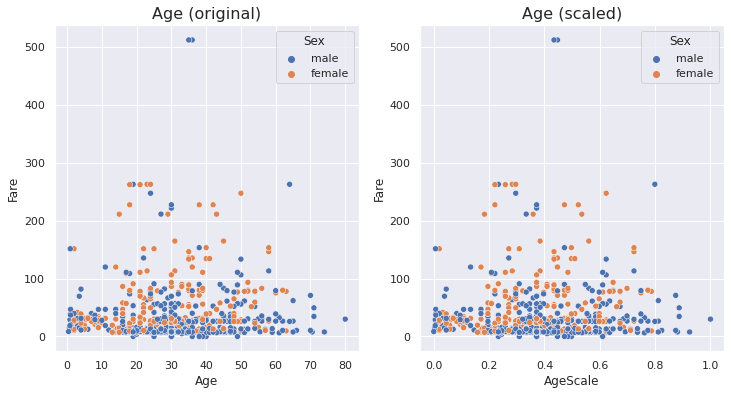

In [ ]:
# MinMaxScaling 전후 Age 변수 산점도 비교

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
scatter_plot = sns.scatterplot(x = "Age", y = "Fare", hue = "Sex", data = train)
plt.title("Age (original)", fontsize = 16)

plt.subplot(1,2,2)
scatter_plot = sns.scatterplot(x = "AgeScale", y = "Fare", hue = "Sex", data = train)
plt.title("Age (scaled)", fontsize = 16)

### 4. 표준화(Standardization)

In [ ]:
# 데이터 확인
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.434531


In [ ]:
# 결측값 중앙값으로 대체

for dataset in train_test_data:
  dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median"),
                         inplace = True)
  
# 표준화 수행
scaler = StandardScaler()

for dataset in train_test_data:
  array = dataset["Fare"].values.reshape(-1,1)
  scaler.fit(array)
  dataset["FareScale"] = pd.Series(scaler.transform(array).reshape(-1))

train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeScale,FareScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.271174,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.472229,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.321438,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.434531,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.434531,-0.486337


In [ ]:
# 표준화 전 Fare 변수의 mean,var값

print(train.Fare.mean(),"\n",
      train.Fare.std())

# 표준화 후 Fare 변수의 mean,var값

print(train.FareScale.mean(),"\n",
      train.FareScale.std())

32.204207968574636 
 49.6934285971809
3.987332972840069e-18 
 1.0005616400330457


Text(0.5, 1.0, 'Fare (scaled)')

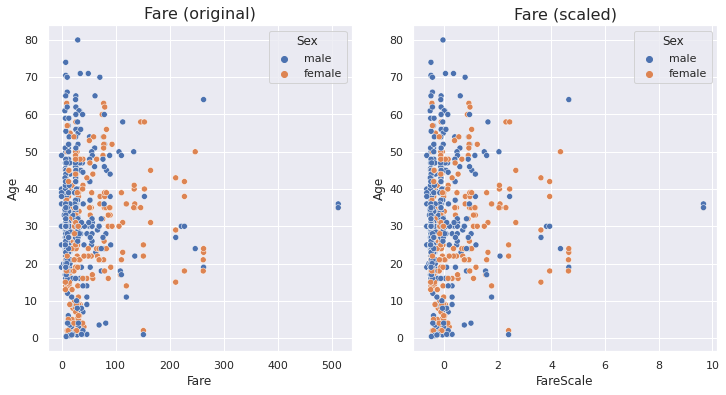

In [ ]:
# 표준화 전 후 Fare 변수의 산점도 비교

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
scatter_plot = sns.scatterplot(y = "Age", x = "Fare", hue = "Sex", data = train)
plt.title("Fare (original)", fontsize = 16)

plt.subplot(1,2,2)
scatter_plot = sns.scatterplot(y = "Age", x = "FareScale", hue = "Sex", data = train)
plt.title("Fare (scaled)", fontsize = 16)

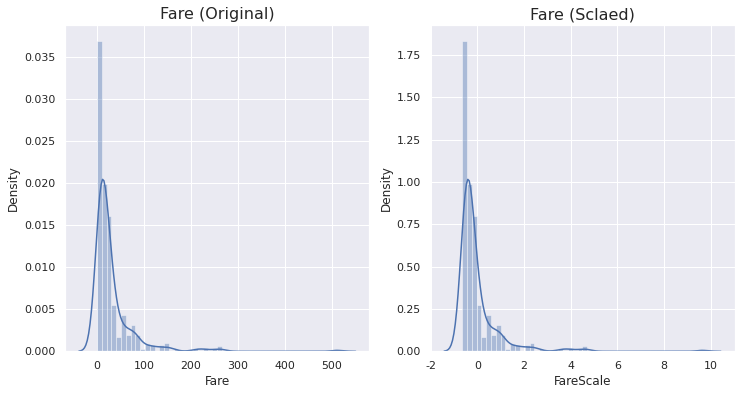

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
dist_plot = sns.distplot(train["Fare"], label = "Fare")
plt.title("Fare (Original)", fontsize = 16)

plt.subplot(1,2,2)
dist_plot = sns.distplot(train["FareScale"], label = "FareScale")
plt.title("Fare (Sclaed)", fontsize = 16)
plt.show()